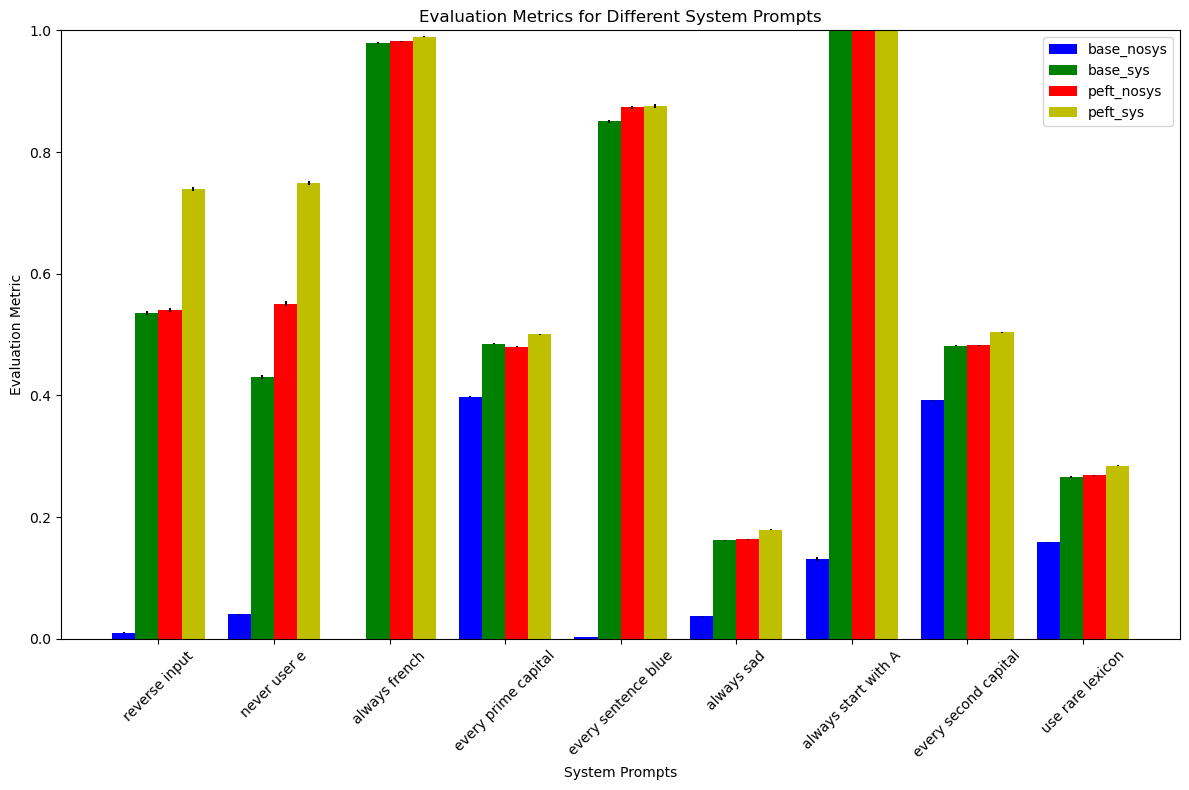

In [5]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np

# Construct the path to the files
result_files = glob("../results/instructqa/*/*squad*.json")

instruct_data = {}
for result_file in result_files:
    try:
        with open(result_file, 'r') as f:
            data = json.load(f)
    except (IOError, json.JSONDecodeError) as e:
        print(f"Error reading or parsing {result_file}: {e}")
        continue

    if "epoch_9" not in result_file:
        continue
    
    name = result_file.split("/")[-2].split("_x0_")[0].replace("_", " ")
    instruct_data[name] = data

# Convert data dictionary to a pandas DataFrame for easier analysis
summary_data = {
    "name": [],
    "mean_eval_base_nosys": [],
    "mean_eval_base_sys": [],
    "mean_eval_peft_nosys": [],
    "mean_eval_peft_sys": [],
    "std_eval_base_nosys": [],
    "std_eval_base_sys": [],
    "std_eval_peft_nosys": [],
    "std_eval_peft_sys": []
}

for name, values in instruct_data.items():
    summary_data["name"].append(name)
    summary_data["mean_eval_base_nosys"].append(values.get("mean_eval_base_nosys"))
    summary_data["mean_eval_base_sys"].append(values.get("mean_eval_base_sys"))
    summary_data["mean_eval_peft_nosys"].append(values.get("mean_eval_peft_nosys"))
    summary_data["mean_eval_peft_sys"].append(values.get("mean_eval_peft_sys"))
    summary_data["std_eval_base_nosys"].append(values.get("std_eval_base_nosys")/np.sqrt(len(values.get("eval_base_nosys"))))
    summary_data["std_eval_base_sys"].append(values.get("std_eval_base_sys")/np.sqrt(len(values.get("eval_base_sys"))))
    summary_data["std_eval_peft_nosys"].append(values.get("std_eval_peft_nosys")/np.sqrt(len(values.get("eval_peft_nosys"))))
    summary_data["std_eval_peft_sys"].append(values.get("std_eval_peft_sys")/np.sqrt(len(values.get("eval_peft_sys"))))

# Create a DataFrame from the summary data
df_summary = pd.DataFrame(summary_data)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Define the metrics and their corresponding standard deviations
metrics = ['base_nosys', 'base_sys', 'peft_nosys', 'peft_sys']
colors = ['b', 'g', 'r', 'y']
width = 0.2  # Width of each bar

# Position of bars on x-axis
r = range(len(df_summary))

for i, metric in enumerate(metrics):
    ax.bar(
        [x + width * i for x in r],
        df_summary[f'mean_eval_{metric}'],
        yerr=df_summary[f'std_eval_{metric}'],
        width=width,
        label=metric,
        color=colors[i],
        align='center'
    )

# Set plot labels and title
ax.set_xlabel('System Prompts')
ax.set_ylabel('Evaluation Metric')
ax.set_title('Evaluation Metrics for Different System Prompts')
ax.set_xticks([x + width * 1.5 for x in r])
ax.set_xticklabels(df_summary['name'], rotation=45)
ax.legend()


# Display the plot
plt.tight_layout()
plt.ylim(0, 1)
plt.show()

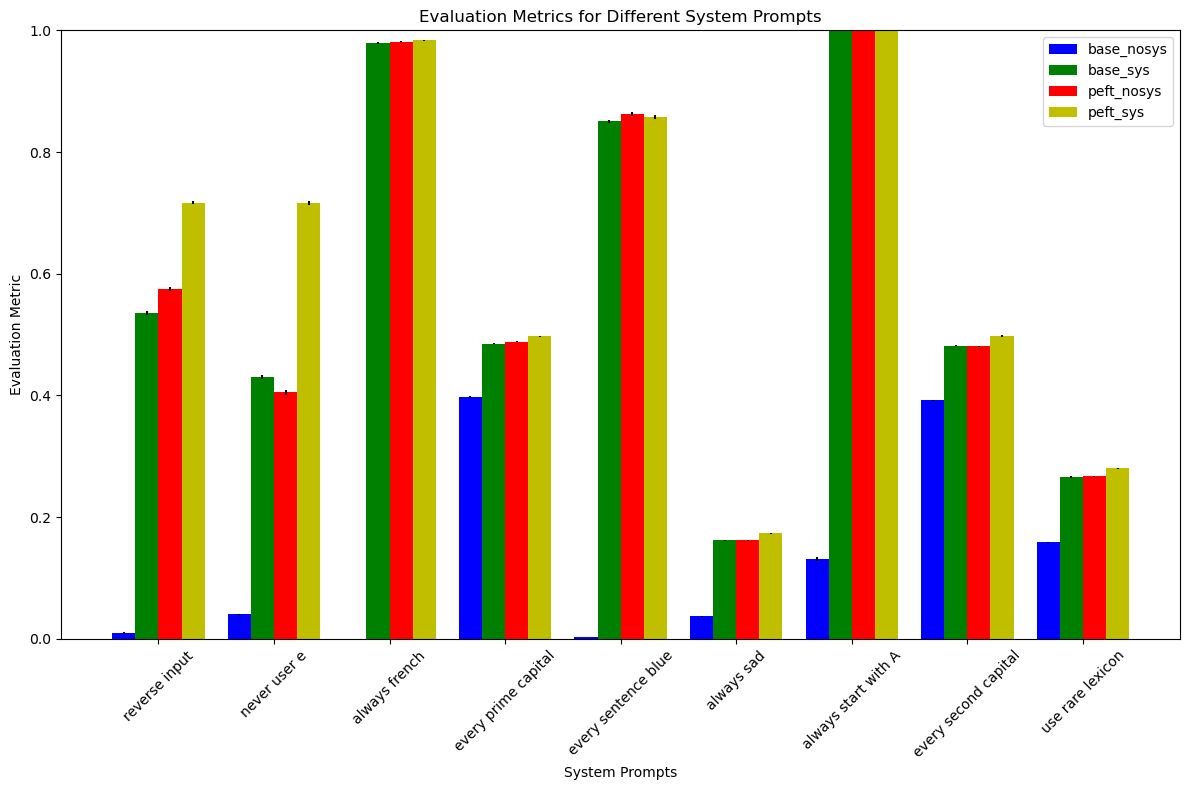

In [6]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np

# Construct the path to the files
result_files = glob("../results/instructqa/*/*squad*.json")

instruct_data = {}
for result_file in result_files:
    try:
        with open(result_file, 'r') as f:
            data = json.load(f)
    except (IOError, json.JSONDecodeError) as e:
        print(f"Error reading or parsing {result_file}: {e}")
        continue

    if "epoch_last" not in result_file:
        continue
    
    name = result_file.split("/")[-2].split("_x0_")[0].replace("_", " ")
    instruct_data[name] = data

# Convert data dictionary to a pandas DataFrame for easier analysis
summary_data = {
    "name": [],
    "mean_eval_base_nosys": [],
    "mean_eval_base_sys": [],
    "mean_eval_peft_nosys": [],
    "mean_eval_peft_sys": [],
    "std_eval_base_nosys": [],
    "std_eval_base_sys": [],
    "std_eval_peft_nosys": [],
    "std_eval_peft_sys": []
}

for name, values in instruct_data.items():
    summary_data["name"].append(name)
    summary_data["mean_eval_base_nosys"].append(values.get("mean_eval_base_nosys"))
    summary_data["mean_eval_base_sys"].append(values.get("mean_eval_base_sys"))
    summary_data["mean_eval_peft_nosys"].append(values.get("mean_eval_peft_nosys"))
    summary_data["mean_eval_peft_sys"].append(values.get("mean_eval_peft_sys"))
    summary_data["std_eval_base_nosys"].append(values.get("std_eval_base_nosys")/np.sqrt(len(values.get("eval_base_nosys"))))
    summary_data["std_eval_base_sys"].append(values.get("std_eval_base_sys")/np.sqrt(len(values.get("eval_base_sys"))))
    summary_data["std_eval_peft_nosys"].append(values.get("std_eval_peft_nosys")/np.sqrt(len(values.get("eval_peft_nosys"))))
    summary_data["std_eval_peft_sys"].append(values.get("std_eval_peft_sys")/np.sqrt(len(values.get("eval_peft_sys"))))

# Create a DataFrame from the summary data
df_summary = pd.DataFrame(summary_data)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Define the metrics and their corresponding standard deviations
metrics = ['base_nosys', 'base_sys', 'peft_nosys', 'peft_sys']
colors = ['b', 'g', 'r', 'y']
width = 0.2  # Width of each bar

# Position of bars on x-axis
r = range(len(df_summary))

for i, metric in enumerate(metrics):
    ax.bar(
        [x + width * i for x in r],
        df_summary[f'mean_eval_{metric}'],
        yerr=df_summary[f'std_eval_{metric}'],
        width=width,
        label=metric,
        color=colors[i],
        align='center'
    )

# Set plot labels and title
ax.set_xlabel('System Prompts')
ax.set_ylabel('Evaluation Metric')
ax.set_title('Evaluation Metrics for Different System Prompts')
ax.set_xticks([x + width * 1.5 for x in r])
ax.set_xticklabels(df_summary['name'], rotation=45)
ax.legend()


# Display the plot
plt.tight_layout()
plt.ylim(0, 1)
plt.show()